pip install matplotlib
pip install pandas
pip install geopy
pip install ephem

In [1]:
import angles as a
from datetime import date, time, datetime, timedelta
import pandas as pd
import itertools

In [2]:
o = a.observer()
columns = ['date_time', 'date', 'time', 'altitude', 'azimuth', 'south', 'west']
def slap(flea):
    if flea == 1:
        count, table = a.compute_table(o, date(2022,10,21),date(2023,10,21),time(5,0,0),time(21,0,0))
        a.print_table(o, count, table)
    if flea == 2:
        args = [[34, 0, 25, 0],[68,180,25,0],[34, 90, 25, 90],[68,270,25,90],[34, 180, 25, 180],[68,0,25,180]]
        print([a.compute_surface_incident_angle(*arg) for arg in args] == [9.0, 93.0, 9.0, 93.0, 9.0, 93.0])
    if flea == 3:
        angles = a.compute_angles_for_time_window(o, date(2020,6,21),date(2020,6,21),time(13,0,0),time(14,0,0),minutes=1)
        data = pd.DataFrame(angles, columns=columns)
        print(data.head(100))
        print(data.size)
    if flea == 4:
        angles = a.compute_angles(o, datetime(2020,6,21,10), datetime(2020,6,21,14), minutes=5)
        data = pd.DataFrame(angles, columns=columns)
        print(data.head(100))
    if flea == 5:
        angles = a.compute_angles_for_time_window(o, date(2020,1,21),date(2020,1,21),time(13,0,0),time(14,0,0),minutes=1,incline=46)
        data = pd.DataFrame(angles, columns=columns)
        print(data[['south', 'west']].sum())
  

In [3]:
for flea in [1]:
    print('+++++++++++++++++')
    print('flea:', flea)
    print('+++++++++++++++++')
    slap(flea)

+++++++++++++++++
flea: 1
+++++++++++++++++
location: Portland, Oregon lon: -122:40:27.1 lat: 45:31:12.9
count: 2560
python version:  3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) 
[Clang 6.0 (clang-600.0.57)]
2022-10-21	06:11	-15°	E
2022-10-21	07:35	RISE	105°
2022-10-21	10:07	22°	SE
2022-10-21	12:55	34°	S
2022-10-21	15:42	22°	SW
2022-10-21	18:11	SET	254°
2022-10-21	19:38	-15°	W
2022-10-22	06:09	-16°	E
2022-10-22	07:37	RISE	105°
2022-10-22	10:06	22°	SE
2022-10-22	12:55	33°	S
2022-10-22	15:42	22°	SW
2022-10-22	18:10	SET	254°
2022-10-22	19:39	-16°	W
2022-10-23	06:08	-16°	E
2022-10-23	07:38	RISE	106°
2022-10-23	10:05	21°	SE
2022-10-23	12:54	33°	S
2022-10-23	15:43	21°	SW
2022-10-23	18:08	SET	254°
2022-10-23	19:41	-16°	W
2022-10-24	06:06	-17°	E
2022-10-24	07:39	RISE	106°
2022-10-24	10:04	21°	SE
2022-10-24	12:54	33°	S
2022-10-24	15:44	21°	SW
2022-10-24	18:06	SET	253°
2022-10-24	19:42	-17°	W
2022-10-25	06:05	-17°	E
2022-10-25	07:41	RISE	107°
2022-10-25	10:03	21°	SE
2022-10-25	12:54	32°	S
2

In [4]:
year = a.current_year()
d1 = a.winter_solstice(year-1)
d2 = a.winter_solstice(year)
t1 = time(5,20,0)
t2 = time(21,0,0)
minutes = 5

<AxesSubplot:xlabel='time'>

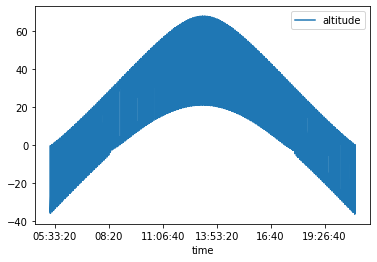

In [5]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=25)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
data[['time','altitude']].plot(x='time')

In [6]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=45)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
print(data[['south', 'west', 'total']].sum())

south    2.420855e+06
west     1.762327e+06
total    4.006949e+06
dtype: float64


In [7]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=65)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
print(data[['south', 'west', 'total']].sum())

south    2.837710e+06
west     1.988875e+06
total    4.627698e+06
dtype: float64


In [8]:
dt = a.today()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2022-11-18', '05:34', '-28°', 'E']
['2022-11-18', '08:14', 'RISE', '117°']
['2022-11-18', '09:47', '12°', 'SE']
['2022-11-18', '12:55', '25°', 'S']
['2022-11-18', '16:03', '13°', 'SW']
['2022-11-18', '17:34', 'SET', '242°']
['2022-11-18', '20:16', '-28°', 'W']


In [9]:
dt = a.vernal_equinox()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2022-03-21', '07:12', 'RISE', '89°']
['2022-03-21', '07:18', '1°', 'E']
['2022-03-21', '10:56', '35°', 'SE']
['2022-03-21', '13:17', '45°', 'S']
['2022-03-21', '15:38', '35°', 'SW']
['2022-03-21', '19:14', '1°', 'W']
['2022-03-21', '19:22', 'SET', '271°']


In [10]:
dt = a.summer_solstice(a.current_year())
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2022-06-21', '05:22', 'RISE', '54°']
['2022-06-21', '08:52', '34°', 'E']
['2022-06-21', '11:48', '62°', 'SE']
['2022-06-21', '13:13', '68°', 'S']
['2022-06-21', '14:37', '62°', 'SW']
['2022-06-21', '17:31', '34°', 'W']
['2022-06-21', '20:59', 'SET', '305°']


In [11]:
dt = a.autumnal_equinox()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2022-09-21', '06:57', 'RISE', '88°']
['2022-09-21', '07:05', '1°', 'E']
['2022-09-21', '10:42', '35°', 'SE']
['2022-09-21', '13:03', '45°', 'S']
['2022-09-21', '15:24', '35°', 'SW']
['2022-09-21', '19:01', '1°', 'W']
['2022-09-21', '19:07', 'SET', '271°']


In [12]:
dt = a.winter_solstice(a.current_year())
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2022-12-21', '05:27', '-34°', 'E']
['2022-12-21', '08:48', 'RISE', '124°']
['2022-12-21', '09:48', '7°', 'SE']
['2022-12-21', '13:08', '21°', 'S']
['2022-12-21', '16:27', '8°', 'SW']
['2022-12-21', '17:26', 'SET', '236°']
['2022-12-21', '20:49', '-34°', 'W']
